## POSTTEST 5(SUPERVISED LEARNING)

## IMPORT PACKAGE
- Pandas
- Numpy
- Matplotlib
- Scikit-Learn(Sklearn)

In [33]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

## Record File "tangsel_covid19.csv"

In [34]:
df = pd.read_csv('tangsel_covid19.csv')
df.head()

,Unnamed: 0,ODP,PDP,POSITIF,SEMBUH,MENINGGAL
0,3/26/2020,204,89,17,0,4
1,3/27/2020,207,99,17,0,4
2,3/29/2020,256,119,28,0,4
3,3/30/2020,262,123,31,0,6
4,3/31/2020,308,134,34,2,6


## Deskripsi Data

In [35]:
df.describe()

,ODP,PDP,POSITIF,SEMBUH,MENINGGAL
count,14.000000,14.000000,14.000000,14.000000,14.000000
mean,414.285714,168.142857,37.428571,2.000000,9.785714
std,159.842917,53.633883,10.761143,2.253203,4.790673
min,204.000000,89.000000,17.000000,0.000000,4.000000
25%,273.500000,125.750000,31.750000,0.500000,6.000000
50%,393.500000,163.000000,41.000000,2.000000,10.000000
75%,581.250000,221.500000,44.000000,2.000000,14.500000
max,630.000000,245.000000,50.000000,9.000000,16.000000


# Info Data

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  14 non-null     object
 1   ODP         14 non-null     int64 
 2   PDP         14 non-null     int64 
 3   POSITIF     14 non-null     int64 
 4   SEMBUH      14 non-null     int64 
 5   MENINGGAL   14 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 800.0+ bytes


## Korelasi Data

In [37]:
df.corr()

,ODP,PDP,POSITIF,SEMBUH,MENINGGAL
ODP,1.000000,0.996361,0.906181,0.678120,0.987648
PDP,0.996361,1.000000,0.912575,0.696361,0.985084
POSITIF,0.906181,0.912575,1.000000,0.545665,0.889726
SEMBUH,0.678120,0.696361,0.545665,1.000000,0.655613
MENINGGAL,0.987648,0.985084,0.889726,0.655613,1.000000


In [38]:
df.isna().sum()

Unnamed: 0    0
ODP           0
PDP           0
POSITIF       0
SEMBUH        0
MENINGGAL     0
dtype: int64

## Exploratory Data Analysis(EDA)

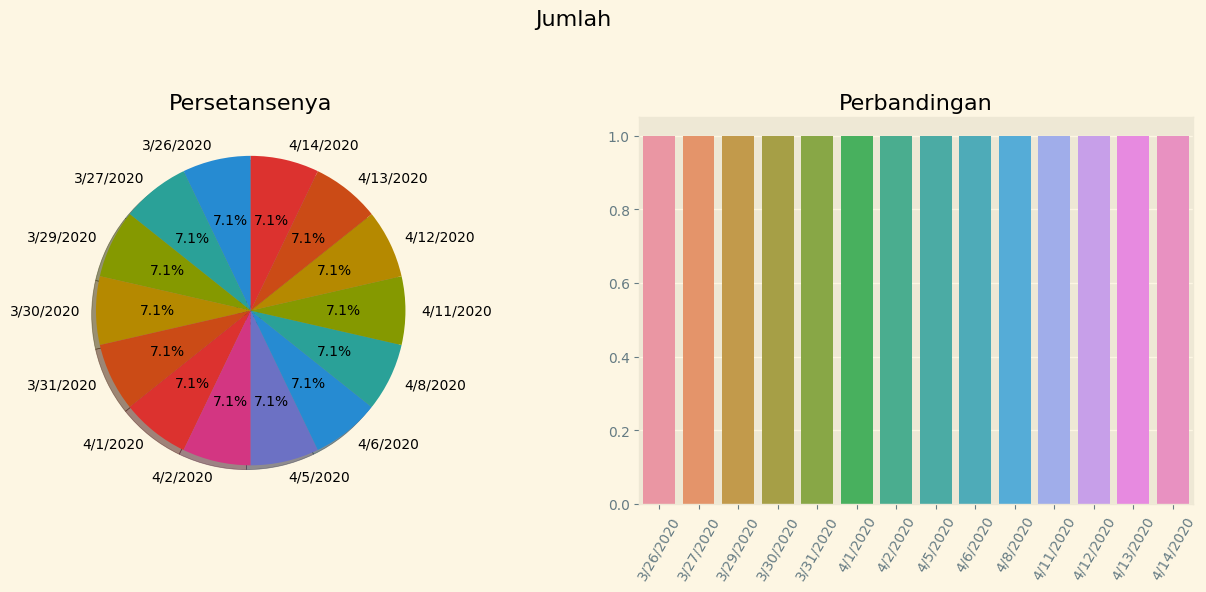

In [39]:
plt.style.use('Solarize_Light2')

Kategori = df["Unnamed: 0"].value_counts().reset_index()

fig, ax = plt.subplots(1, 2, figsize=(14,6))
fig.tight_layout(pad=5.0)

ax[0].pie(Kategori['Unnamed: 0'],labels=Kategori['index'],startangle=90,autopct='%.1f%%',shadow=True)
ax[0].title.set_text("Persetansenya")


X_index = list(Kategori['index'])
y_species = list(Kategori['Unnamed: 0'])
sns.barplot(x=X_index,y=y_species,ax=ax[1])
ax[1].title.set_text("Perbandingan")

fig.subplots_adjust(top=0.8)
plt.xticks(rotation=60)
plt.suptitle("Jumlah",size=16)
plt.show()

<Figure size 2000x1500 with 0 Axes>

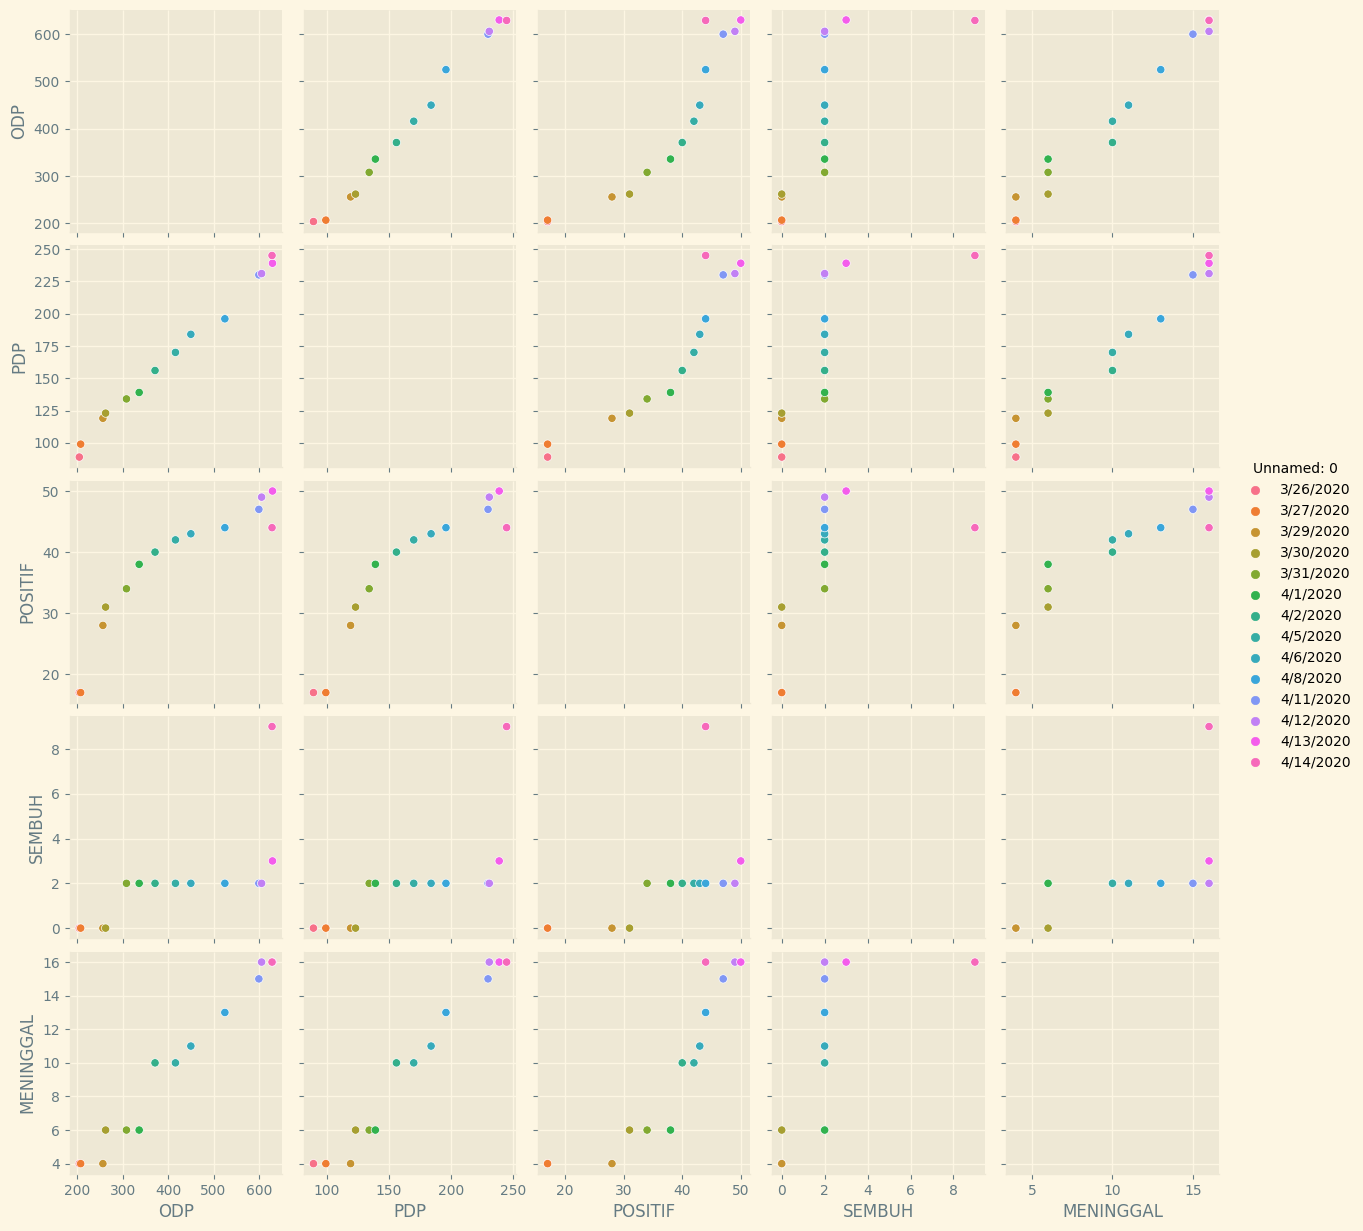

In [40]:
plt.figure(figsize=(20,15))
sns.pairplot(df,hue="Unnamed: 0")
plt.show()

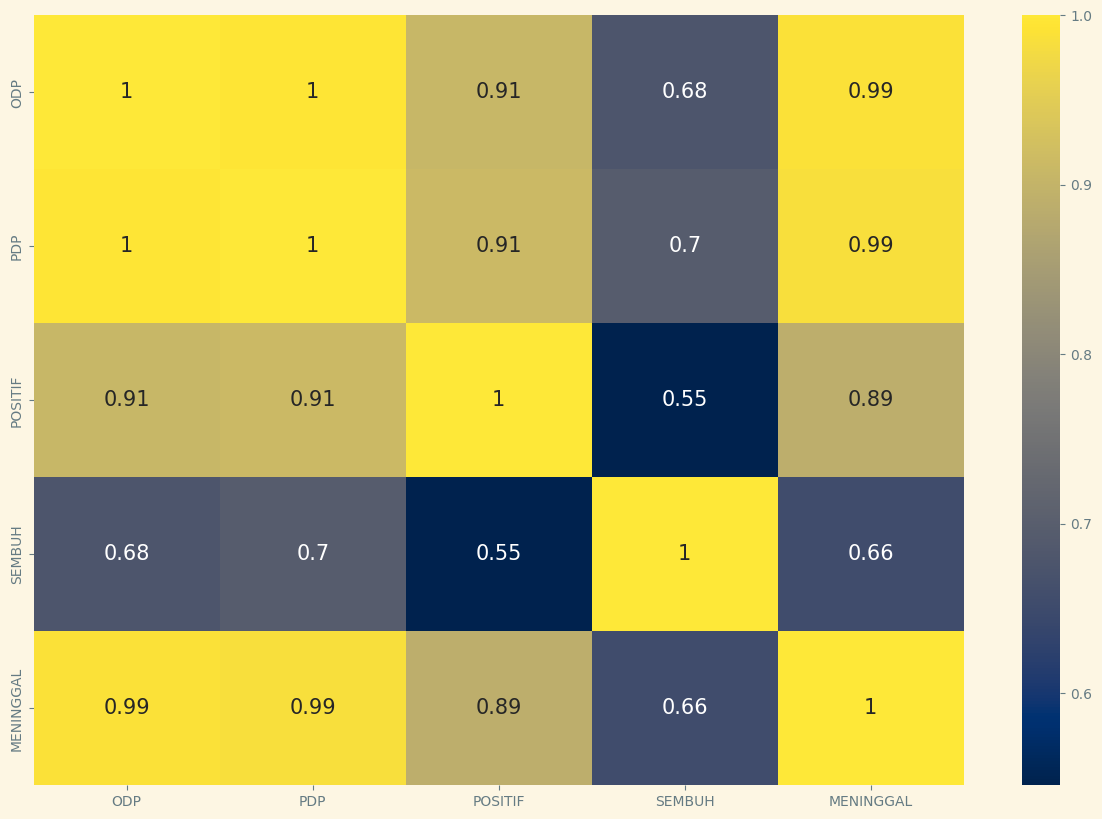

In [41]:
plt.figure(figsize=(15,10))

sns.heatmap(df.corr(),cmap='cividis',annot=True,annot_kws={"size":15})
plt.show()

## KLASIFIKASI DATA
Klasifikasi digunakan ketika variabel keluaran (output) adalah categorical.
Misalnya suatu dataset memiliki 2 kelas atau lebih pada value-nya, seperti ya
atau tidak, pria atau wanita, benar atau salah, besar atau sedang atau kecil,
dan lain-lain.

## Split Data 

In [42]:
data = df[['ODP', 'PDP', 'POSITIF', 'SEMBUH', 'MENINGGAL']]
label = df[['Unnamed: 0']]

data_train, data_test, label_train, label_test = train_test_split(data, label, test_size=.2)

## K-Nearest Neighbour (KNN)
K-Nearest Neighbour atau algoritma KNN
menggunakan algoritma non-parametrik
yang mengelompokkan poin data
berdasarkan kedekatan dan juga asosiasi
mereka dengan data lain.
Algoritma KNN mengasumsikan bahwa
titik data yang serupa akan selalu bisa
ditemukan di sekitarnya. Konsekuensinya,
algoritma ini pun selalu berupaya untuk
menghitung jarak antar titik data (biasanya dengan Euclidean distance) dan
kemudian menentukan kategori berdasarkan jenis yang paling sering muncul.
KNN ini disukai banyak ilmuwan data atau data scientists. Sebab,
penggunaannya relatif mudah dan waktu perhitungannya pun cukup rendah.
Namun, saat terus dilakukan uji dataset, waktu pemrosesan pun menjadi
semakin lama. Oleh karena itu, KNN lebih sering dimanfaatkan untuk
recommendation system dan image recognition.

In [43]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(data_train,label_train)

KNeighborsClassifier()

In [44]:
predict_label = knn.predict(data_test)

In [45]:
akurasi = accuracy_score(label_test, predict_label)

In [46]:
print("Akurasi algoritma KNN dengan default paramater :", {akurasi})

Akurasi algoritma KNN dengan default paramater : {0.0}


## Decision Tree
Decision Tree adalah sebuah tipe model yang digunakan untuk Supervised
Learning. Decision Tree dapat digunakan untuk menyelesaikan masalah
klasifikasi dan regresi, namun lebih sering digunakan untuk masalah
klasifikasi.
Decision Tree memiliki bentuk seperti pohon, dimana tree memiliki node akar
(root node), decision node dan node daun (leaf node). Leaf node adalah node
akhir yang tidak dapat dipecah dan yang akan menentukan hasil prediksi
decision tree.
Decision Tree bekerja dengan melakukan klasifikasi berdasarkan atribut yang
paling membedakan. Algoritma decision tree akan dimulai pada node akar,
kemudian akan melakukan perbandingan antara nilai yang ada pada dataset
dan data yang ingin diprediksi. Berdasarkan perbandingan tersebut, algoritma
akan turun ke bawah dan melanjutkan ke sub-node yang lebih dalam.
Algoritma ini akan berulang hingga mencapai leaf node, dimana keputusan
prediksi bisa dibuat.

In [47]:
dt = DecisionTreeClassifier()
dt.fit(data_train, label_train)

DecisionTreeClassifier()

In [48]:
predict_label = dt.predict(data_test)

In [49]:
akurasi = accuracy_score(label_test, predict_label)

In [50]:
print("Akurasi algoritma Decision Tree dengan default paramater :", {akurasi})

Akurasi algoritma Decision Tree dengan default paramater : {0.0}


## Naive Bayes
Berikutnya ada Naïve Bayes, yang mengadopsi prinsip kemandirian kelas
bersyarat dari Teorema Bayes. Dalam prinsip tersebut, ada tidaknya satu
elemen tidak akan memengaruhi komponen lain dalam probabilitas hasil yang
akan diberikan, dengan predictor yang mendapatkan efek yang sama.

In [51]:
gnb  = GaussianNB()
gnb.fit(data_train,label_train)

GaussianNB()

In [52]:
predict_label = gnb.predict(data_test)

In [53]:
akurasi = accuracy_score(label_test, predict_label)

In [54]:
print("Akurasi algoritma Naive Bayes dengan default paramater :", {akurasi})

Akurasi algoritma Naive Bayes dengan default paramater : {0.0}


## Support Vector Machine(SVM)
Support Vector Machine atau sering disingkat SVM merupakan metode
algoritma Supervised Learning yang dikembangkan oleh Vladimir Vapnik.
Metode ini biasanya digunakan dalam data classification dan juga regression.

In [55]:
svc = SVC()
svc.fit(data_train,label_train)

SVC()

In [56]:
predict_label = svc.predict(data_test)

In [57]:
akurasi = accuracy_score(label_test, predict_label)

In [58]:
print("Akurasi algoritma SVC dengan default paramater :", {akurasi})

Akurasi algoritma SVC dengan default paramater : {0.0}


## REGRESI DATA
Regresi digunakan ketika variabel keluaran (output) bernilai real atau kontinyu.
Pada kasus ini, terdapat hubungan antara dua variabel atau lebih misalnya
suatu variabel berubah apabila ada perubahan dengan variabel lainnya.

## Split Data

In [59]:
data, label = datasets.load_diabetes(return_X_y=True)
data = data[:, np.newaxis, 2]

data_train2 = data[:-50]
data_test2 = data[-50:]

label_train2 = label[:-50]
label_test2 = label[-50:]

## Linear Regresion
Algoritma supervised learning yang satu ini biasanya digunakan dalam
identifikasi hubungan antara variabel dependen dengan satu (atau lebih)
variabel independen. Identifikasi tersebut kemudian digunakan untuk
memprediksi hasil di masa depan.
Jika hanya ada satu variabel dependen dan satu variabel independen, maka
disebut dengan simple Regresi Linear. Namun, jika terdapat banyak variabel
sekaligus, disebut dengan istilah multiple Regresi Linear.

In [60]:
reg = LinearRegression()
reg.fit(data_train2,label_train2)

LinearRegression()

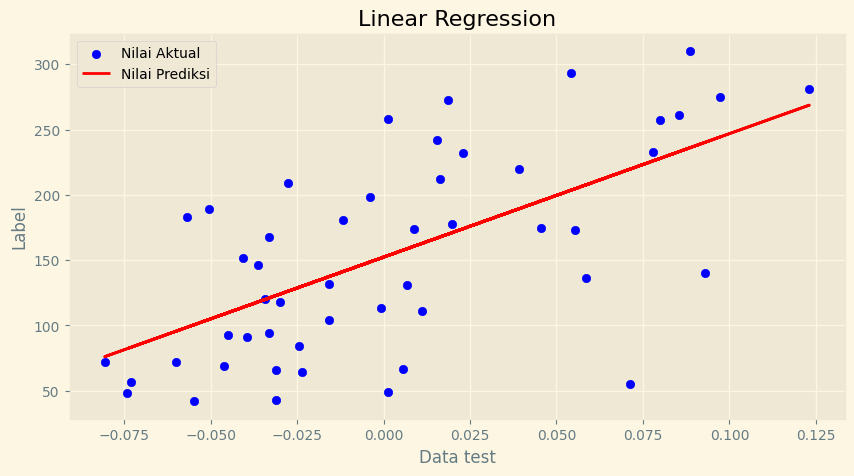

In [61]:
predict_label = reg.predict(data_test2)

plt.figure(figsize=(10,5))

plt.scatter(data_test2, label_test2, color="blue",label="Nilai Aktual")
plt.plot(data_test2, predict_label, color="red",label="Nilai Prediksi")
plt.title('Linear Regression')
plt.xlabel('Data test')
plt.ylabel('Label')
plt.legend(loc ='upper left')
plt.show()